# IS319 - Deep Learning

## TP1 - Neural networks

The goal of this TP is to implement a simple feedforward neural network, but without the use of libraries like PyTorch or TensorFlow. We will only use NumPy.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Activation function and its derivative

**(Question)** Implement the following activation function and its respective gradient (vector of partial derivatives). These should be applied element-wise to the input vector `a`.

In [2]:
def sigmoid(a):
    '''Return the element-wise sigmoid of the input vector.'''
    return 1/(1+np.exp(-a))


def d_sigmoid(a):
    '''Return the partial derivatives of the sigmoid function
    with respect to the input vector.'''
    # YOUR CODE HER
    return (1-sigmoid(a))*sigmoid(a)

In [3]:
a = np.random.randn(100)
assert np.all(sigmoid(a) >= 0.)
assert np.all(sigmoid(a) <= 1.)
assert sigmoid(0.) == 0.5
assert np.all(d_sigmoid(a) >= 0.)
assert np.all(d_sigmoid(a) <= 0.25)

## 2. Loss function and its derivative

**(Question)** Implement the following loss function and its respective gradient (vector of partial derivatives).

`y` and `d` correspond to predictions and ground-truth labels respectively. They are assumed to be be matrices of size `n_classes * n_samples`.

In [4]:
def squared_error(y, d):
    '''Return a scalar corresponding to the sum of squared errors.'''
    # The sum instead of mean will be more convenient for this TP
    # YOUR CODE HERE
    delta = y - d
    delta = delta**2
    loss = np.sum(delta)
    return loss/2

def d_squared_error(y, d):
    '''Return the vector of partial derivatives of the sum of
    squared errors with respect to the predictions.'''
    # YOUR CODE HERE
    return (y-d)

In [5]:
y = np.random.randn(3, 100)
d = np.random.randn(3, 100)
assert squared_error(y, d) >= 0.
assert d_squared_error(y, d).shape == y.shape

## 3. Neural network architecture

We will implement a simple fully-connected neural network with **one hidden layer** and **one output layer**.

This neural network is defined by a number of inputs, a number of hidden units, and a number of output units.

The activation function will be sigmoid and the loss function will be the sum of squared errors, both implemented above.

**(Question)** Complete the class below to initialize the weights and biases randomly.

In [6]:
class NeuralNetwork():
    def __init__(self, n_input, n_hidden, n_output):
        '''Initialize a neural network with `n_input` input neurons,
        `n_hidden` hidden neurons and `n_output` output neurons.'''
        self.n_input = n_input
        self.n_hidden = n_hidden
        self.n_output = n_output
        self.init_weights()
        
    def init_weights(self):
        '''Initialize random weights with correct sizes in attributes `W1`, `b1`, `W2` and `b2`.'''
        # YOUR CODE HERE
        self.W1 = np.random.randn(self.n_hidden, self.n_input) * 0.01
        self.b1 = np.random.randn(self.n_hidden, 1) * 0.01

        self.W2 = np.random.randn(self.n_output, self.n_hidden) * 0.01
        self.b2 = np.random.randn(self.n_output, 1) * 0.01

In [7]:
nn = NeuralNetwork(64, 32, 3)
assert nn.W1.ndim == 2
assert nn.b1.ndim == 2
assert nn.W2.ndim == 2
assert nn.b2.ndim == 2

## 4. Forward pass

The forward pass is defined as:
$$\begin{align*}
\mathbf{h}_1 &= \sigma(\mathbf{a}_1) \quad\text{with}\quad \mathbf{a}_1 = \mathbf{W}_1 \mathbf{x} + \mathbf{b}_1 \\
\mathbf{y} &= \sigma(\mathbf{a}_2) \quad\text{with}\quad \mathbf{a}_2 = \mathbf{W}_2 \mathbf{h}_1 + \mathbf{b}_2
\end{align*}$$

**(Question)** Implement the forward pass for input examples `X`. Save intermediate results `a1`, `h1` and `a2` into attributes (as they will be needed for the backpropagation algorithm).

In [8]:
class NeuralNetwork(NeuralNetwork): # (the method will be added to the `NeuralNetwork` class)
    def forward(self, X):
        # YOUR CODE HERE
        self.a1 = np.dot(self.W1, X) + self.b1 #n_hidden,n
        self.h1 = sigmoid(self.a1) 
        self.a2 = np.dot(self.W2, self.h1) + self.b2 #n_output,n
        
        y = sigmoid(self.a2) #(n_output,n)

        return y
        

In [9]:
nn = NeuralNetwork(64, 32, 3)
X = np.random.randn(64, 100)
y = nn.forward(X)
assert y.shape == (3, 100)

**(Question)** Implement the function below to obtain a classification decision from the network. To do that, apply the forward pass, then choose the class corresponding to the maximum output value.

In [10]:
class NeuralNetwork(NeuralNetwork): # (the method will be added to the `NeuralNetwork` class)
    def predict(self, X):
        # YOUR CODE HERE
        d = self.forward(X)
        y = np.argmax(d,axis=0)
        return y
        

In [11]:
nn = NeuralNetwork(64, 32, 3)
X = np.random.randn(64, 100)
y = nn.predict(X)
assert y.shape == (100,)
assert np.any(y == 0) or np.any(y == 1) or np.any(y == 2)

## 5. Backward pass

**(Question)** Implement the backward pass for input examples `X`, ground-truth `d`, predictions `y`.

*Advice 1:* start by working on weights `d_W2` and `d_W1`, then work on the biases `d_b2` and `d_b1`.

*Advice 2:* keep track of the shapes of each partial derivatives using comments.

In [12]:
class NeuralNetwork(NeuralNetwork):
    def backward(self, X, y, d):
        '''Compute the partial derivatives of the loss function
        with respect to all weights of the neural network.
        Return these in variables `d_W1`, `d_b1`, `d_W2` and `d_b2`.'''
        # Backpropagation for the output layer
        # You should compute d_ey, d_ya2, d_a2w2 and finally delta2
        # Then, you can compute d_W2 and d_b2
        d_ey = d_squared_error(y, d) #(n_output,n)
        d_ya2 = d_sigmoid(self.a2) #(n_output,n)
        d_a2w2 = self.h1.T #(n_hidden,n)
        delta2 = d_ey * d_ya2 #(n_output, n)
        # YOUR CODE HERE
        d_W2 = delta2 @ d_a2w2 #(n_output, n_hidden)
        d_b2 = np.sum(delta2,axis=1).reshape(-1,1) #(n_ouput, 1)

        
        # Backpropagation for the hidden layer
        # You should compute d_h1a1 and finally delta1
        # Then, you can compute d_W1 and d_b1
        # YOUR CODE HERE
        dh1a1 = d_sigmoid(self.a1) #(n_hidden,n)
        delta1 = (delta2.T @ self.W2).T * dh1a1 # (n_hidden, n)
        d_W1 = delta1 @ X.T  #(n_hidden,n)
        d_b1 = np.sum(delta1,axis=1).reshape(-1,1) #(n_hidden,1)

        return d_W1, d_b1, d_W2, d_b2



In [13]:
nn = NeuralNetwork(64, 32, 3)
X = np.random.randn(64, 100)
d = np.random.randint(0, 2, size=(3, 100))
y = nn.forward(X)
loss = squared_error(y, d)
d_W1, d_b1, d_W2, d_b2 = nn.backward(X, y, d)
assert d_W1.shape == nn.W1.shape
assert d_b1.shape == nn.b1.shape
assert d_W2.shape == nn.W2.shape
assert d_b2.shape == nn.b2.shape

## 6. Weights update with gradient descent

**(Question)** Complete the following code to implement one iteration of the training process:
- Apply the forward pass on training data and compute the loss
- Apply backpropagation to compute the gradient of the loss with respect to the network parameters
- Apply gradient descent to update the network parameters

In [14]:
class NeuralNetwork(NeuralNetwork):
    def train_iteration(self, X, d, lr=1e-2):
        # Apply the forward pass and compute the loss
        # YOUR CODE HERE
        y_hat = self.forward(X)
        d_W1, d_b1, d_W2, d_b2 = self.backward(X,y_hat,d)
        self.W1 -= lr*d_W1
        self.W2 -= lr*d_W2
        self.b1 -= lr*d_b1
        self.b2 -= lr*d_b2

        loss = squared_error(d,y_hat)
        return loss

In [15]:
nn = NeuralNetwork(64, 32, 3)
X = np.random.randn(64, 100)
d = np.random.randint(0, 2, size=(3, 100))
loss = nn.train_iteration(X, d, lr=100)
assert loss >= 0.

## 7. Mini-batch training loop

Now, we will implement the main training loop of our neural network.

We will use stochastic gradient descent with mini-batch: the weights will be updated by performing gradient descent on shuffled subsets of training data.

We will train the network for a number of epochs (an epoch is performed when the whole training set has been used with this mini-batch procedure).

**(Question)** Complete the code below to implement the training loop with minibatch stochastic gradient descent.

In [16]:
class NeuralNetwork(NeuralNetwork):
    def fit(self, X, d, batch_size, n_epochs=10, lr=1e-2):
        n_samples = X.shape[1]
        n_batches = (n_samples // batch_size) + 1
        
        for e in range(n_epochs):
            epoch_loss = 0.
            # Shuffle dataset
            permutation = np.random.permutation(n_samples)
            X, d = X[:, permutation], d[:, permutation]
            # Loop over each batch
            for b in range(0, n_samples, batch_size): # range(start, stop, step)
                # Grab the current batch in `X_batch` and `d_batch`
                # YOUR CODE HERE
                X_batch, y_batch = X[:,b:b+batch_size], d[:,b:b+batch_size]
                # Apply training iteration and update epoch loss
                # YOUR CODE HERE
                loss = self.train_iteration(X_batch,y_batch,lr)
                epoch_loss += loss
            # Compute average epoch loss and print it
            epoch_loss /= n_batches
            print(f'epoch {e} cumulative loss : {epoch_loss}')

## 8. Train the network on the MNIST dataset

The MNIST dataset is composed of 70000 greyscale images of handwritten digits: 60000 images for training and 10000 for testing.

It is included in the `mnist.tgz` archive provided with this TP.

In [17]:
!tar xvzf ./mnist.tgz
images_train = np.load('./mnist-train-images.npy')
labels_train = np.load('./mnist-train-labels.npy')
images_test = np.load('./mnist-test-images.npy')
labels_test = np.load('./mnist-test-labels.npy')

tar (child): ./mnist.tgz: Cannot open: No such file or directory
tar (child): Error is not recoverable: exiting now
tar: Child returned status 2
tar: Error is not recoverable: exiting now


**(Question)** Reshape the images into vectors and normalize the pixel values between 0 and 1. Convert the labels into one-hot vectors (*i.e.* vectors full of 0 and with only a 1 for the corresponding class). Store the results into `X_train`, `y_train`, `X_test` and `y_test` variables. Make sure to reshape to the following:
- Input data: `n_features x n_samples`
- Labels: `n_classes x n_samples`

In [18]:
# YOUR CODE HERE
X_train = np.load('mnist-train-images.npy')
y_train = np.load('mnist-train-labels.npy')
X_test = np.load('mnist-test-images.npy')
y_test = np.load('mnist-test-labels.npy')

img_shape = X_train[0].shape
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [19]:
X_train = X_train.reshape( X_train.shape[0], -1).T/255
X_test = X_test.reshape(X_test.shape[0], -1).T/255


In [20]:
def to_categorical(y, num_classes):
    id_mat = np.eye(num_classes)
    one_hot_encoded = id_mat[y]
    return one_hot_encoded.T

In [21]:
y_train_cp = y_train[:]
y_test_cp = y_test[:]

y_train, y_test = to_categorical(y_train,10), to_categorical(y_test,10)

print(y_train.shape, y_test.shape)

(10, 60000) (10, 10000)


In [22]:
assert np.all(X_train >= 0.) and np.all(X_train <= 1.)
assert np.all(X_test >= 0.) and np.all(X_test <= 1.)
assert np.all(np.unique(y_train) == np.array([0., 1.])) 
assert np.all(np.unique(y_test) == np.array([0., 1.]))
assert np.all(np.sum(y_train, axis=0) == 1.)
assert np.all(np.sum(y_test, axis=0) == 1.)

**(Question)** Initialize a neural network for MNIST with 32 hidden units and train it for 10 epochs with a batch size of 512.

In [23]:
# YOUR CODE HERE
nn = NeuralNetwork(n_input=X_train.shape[0],n_hidden=32,n_output=y_train.shape[0])
nn.fit(X_train, y_train,n_epochs=10, batch_size=512)

epoch 0 cumulative loss : 209.93013575531086
epoch 1 cumulative loss : 84.31190425595959
epoch 2 cumulative loss : 49.27756300889934
epoch 3 cumulative loss : 40.245344877775025
epoch 4 cumulative loss : 36.06209986090847
epoch 5 cumulative loss : 33.40887605491405
epoch 6 cumulative loss : 31.425519567365182
epoch 7 cumulative loss : 29.903339316884185
epoch 8 cumulative loss : 28.561174723782628
epoch 9 cumulative loss : 27.46329735811303


**(Question)** Compute the classification accuracy on the train and test sets. To do that, you can use the predict function and compare them with the original labels (*i.e.* without one-hot encoding).

In [24]:
# YOUR CODE HERE
y_pred_train = nn.predict(X_train)
y_pred_test = nn.predict(X_test)


acc_train = 0
acc_test = 0

for i in range(len(y_pred_train)):
    if y_pred_train[i] == y_train_cp[i]:
        acc_train += 1

for i in range(len(y_pred_test)):
    if y_pred_test[i] == y_test_cp[i]:
        acc_test += 1

print("Training accuracy :", {acc_train / len(y_pred_train)})
print("Testing accuracy :", {acc_test / len(y_pred_test)})

Training accuracy : {0.93985}
Testing accuracy : {0.9388}


**(Question)** Compute and plot the confusion matrix for the test set. Which are the most difficult classes? Show some examples of misclassified images.

In [25]:
# YOUR CODE HERE
from sklearn.metrics import confusion_matrix
import seaborn as sns


y_pred_te = np.array([np.argmax(elt) for elt in y_pred_test])
y_te = np.array([np.argmax(elt) for elt in y_test.T])


Text(0.5, 1.0, 'Confusion Matrix')

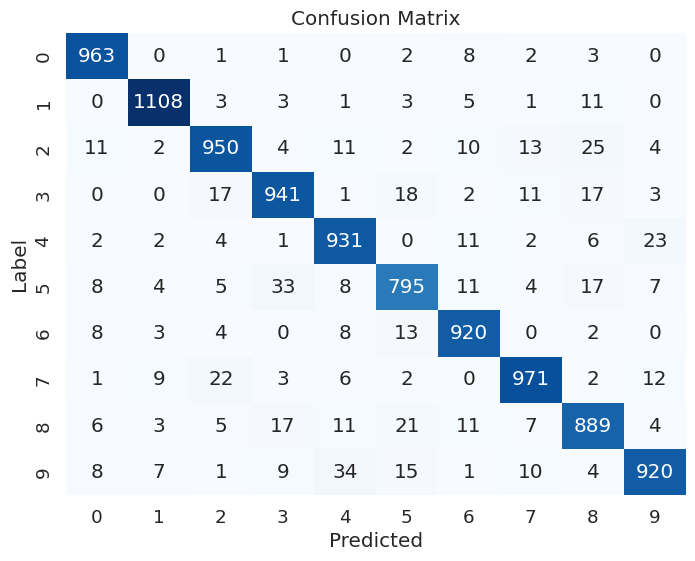

In [26]:

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2) 

confusion_te = confusion_matrix(y_test_cp, y_pred_test)

ax_te = sns.heatmap(confusion_te, annot=True, fmt='d', cmap='Blues', cbar=False)


plt.xlabel('Predicted')
plt.ylabel('Label')
plt.title('Confusion Matrix')

In [27]:
error_rates = []

#Here we compute for each classes the error ratio : misclassification / total samples number
for i in range(confusion_te.shape[0]):
    misclassified_num = sum(confusion_te[i]) - confusion_te[i, i]
    total = sum(confusion_te[i])
    error_rate = misclassified_num / total
    error_rates.append(error_rate)

#Here we try to sort the error rates decreasingly + compute the order of classes accordingly in classes array
classes = np.array([i for i in range(confusion_te.shape[0])])
ordered_errors_idx = np.argsort(error_rates)[::-1]
classes = classes[ordered_errors_idx]

#Here we define the number of  top K hardest classes we want to find
K = 3

hardest_classes = classes[:K]

print("The three most difficult classes are : " + str(hardest_classes))

The three most difficult classes are : [5 9 8]


(784, 606)


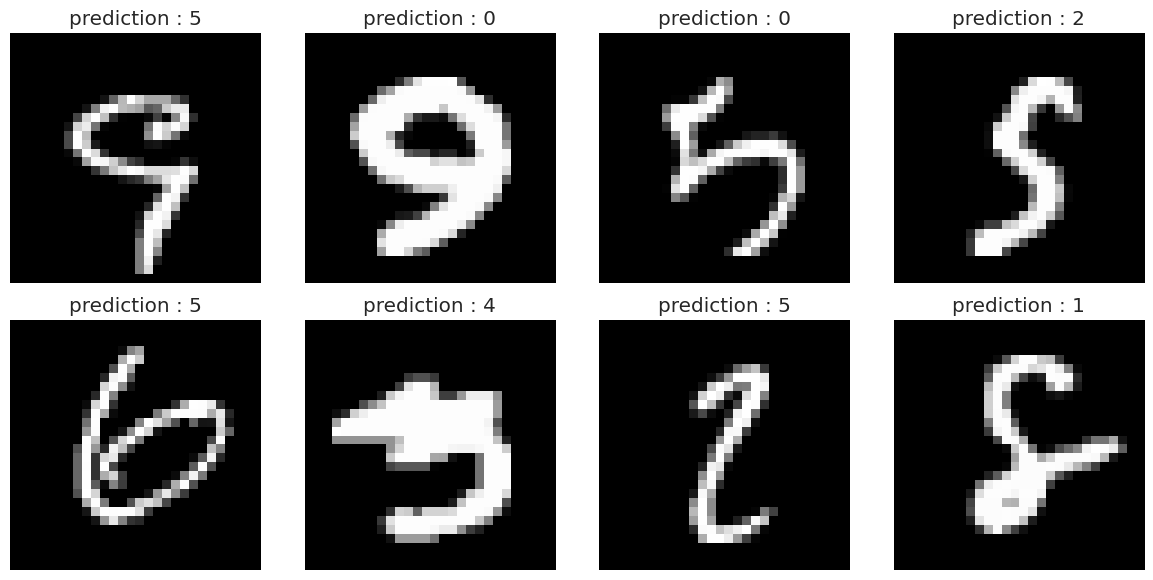

In [39]:
#Here we try to find some misclassified images and then show them

import matplotlib.pyplot as plt
import random

misclassified_idxs = y_pred_test != y_test_cp
mis_imgs = X_test[:,misclassified_idxs]


print(mis_imgs.shape)

random_indexes = random.sample([i for i in range(mis_imgs.shape[1])], 8)

sample = mis_imgs[:,random_indexes]
labels = [ "prediction : "  +  str(x) for x in y_pred_test[random_indexes]]

fig, axes = plt.subplots(2, 4, figsize=(12, 6))

for i in range(8):
    row, col = divmod(i, 4)
    axes[row, col].imshow(sample[:,i].reshape(img_shape), cmap='gray')
    axes[row, col].set_title(labels[i])
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()
    

        

**(Question)** Play around with hyperparameters of the model. What happens when the batch size if very small? And very large?

In [29]:
# YOUR CODE HER

import time

n_epoch = 10

batch_size = 5000 #very large

duration = 0

t0 = time.time()

nn0 = NeuralNetwork(n_input=X_train.shape[0],n_hidden=32,n_output=y_train.shape[0])
nn0.fit(X_train, y_train,n_epochs=10, batch_size=batch_size)

t1 = time.time()

duration = t1-t0

y_pred_test = nn0.predict(X_test)

acc_test = 0

for i in range(len(y_pred_test)):
    if y_pred_test[i] == y_test_cp[i]:
        acc_test += 1

print("Testing accuracy :", {acc_test / len(y_pred_test)})
print("Running time : " + str(duration))

epoch 0 cumulative loss : 2596.757697092012
epoch 1 cumulative loss : 2307.6923076923076
epoch 2 cumulative loss : 2307.6923076923076
epoch 3 cumulative loss : 2307.6923076923076
epoch 4 cumulative loss : 2307.6923076923076
epoch 5 cumulative loss : 2307.6923076923076
epoch 6 cumulative loss : 2307.6923076923076
epoch 7 cumulative loss : 2307.6923076923076
epoch 8 cumulative loss : 2307.6923076923076
epoch 9 cumulative loss : 2307.6923076923076
Testing accuracy : {0.1012}
Running time : 26.547598600387573


Text(0.5, 1.0, 'Confusion Matrix for a very large batch size')

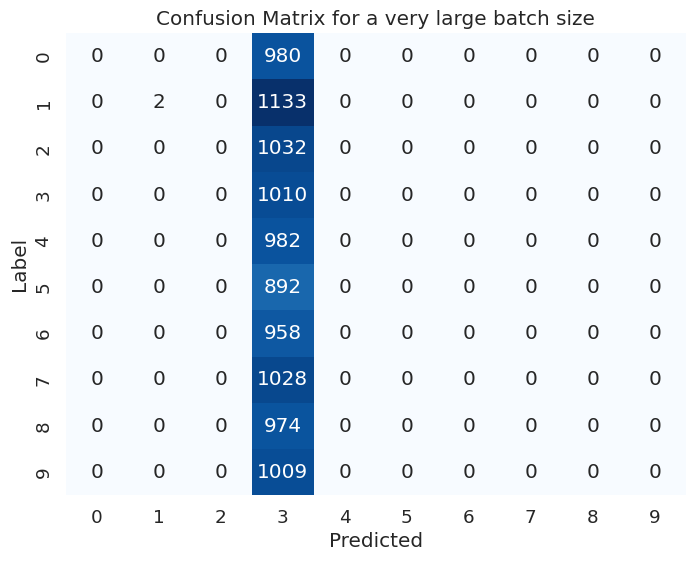

In [30]:
#Confusion matrix for a very large batch size

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)

confusion_te = confusion_matrix(y_test_cp, y_pred_test)

ax_te = sns.heatmap(confusion_te, annot=True, fmt='d', cmap='Blues', cbar=False)


plt.xlabel('Predicted')
plt.ylabel('Label')
plt.title('Confusion Matrix for a very large batch size')

In [31]:
n_epoch = 10

n_hidden_nodes = 10
batch_size = 50 #very small

duration = 0

t0 = time.time()
    
nn1 = NeuralNetwork(n_input=X_train.shape[0],n_hidden=32,n_output=y_train.shape[0])
nn1.fit(X_train, y_train,n_epochs=10, batch_size=batch_size)

t1 = time.time()

duration = t1-t0

y_pred_test = nn1.predict(X_test)

acc_test = 0

for i in range(len(y_pred_test)):
    if y_pred_test[i] == y_test_cp[i]:
        acc_test += 1

print("Testing accuracy : ", {acc_test / len(y_pred_test)})
print("Running time : " + str(duration) )


epoch 0 cumulative loss : 18.26778704289548
epoch 1 cumulative loss : 7.152768657295333
epoch 2 cumulative loss : 4.623240350131157
epoch 3 cumulative loss : 3.9048264228081857
epoch 4 cumulative loss : 3.526227688761654
epoch 5 cumulative loss : 3.2761314553595895
epoch 6 cumulative loss : 3.0880625138665487
epoch 7 cumulative loss : 2.933598617279364
epoch 8 cumulative loss : 2.805446871873466
epoch 9 cumulative loss : 2.693090249607236
Testing accuracy :  {0.9394}
Running time : 33.48363542556763


Text(0.5, 1.0, 'Confusion Matrix for a very small batch size')

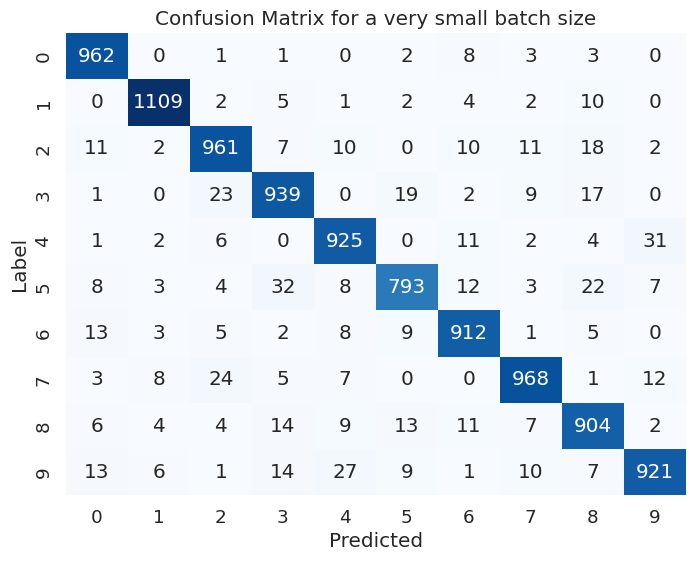

In [32]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)

confusion_te = confusion_matrix(y_test_cp, y_pred_test)

ax_te = sns.heatmap(confusion_te, annot=True, fmt='d', cmap='Blues', cbar=False)


plt.xlabel('Predicted')
plt.ylabel('Label')
plt.title('Confusion Matrix for a very small batch size')

By comparing the two cases we notice that :
- Large batch size :
    - the running time is smaller (less training iterations)
    - the performance of the model is very bad (the model is not well trained)
- Small batch size :
    - the running time is a bit longer (more training iterations)
    - the performance is very good since the model got to train more. According to the accuracy on the testing dataset, despite the fact that the batch size we chose was small (=50), the model didn't overfit the dataset.
    
We also notice that the loss on every epoch is a lot smaller when the batch size is very small while it is very high when the batch size is large. This can be explained by the fact that the smaller the batch size, the more training iterations are there in one Epoch.

## 9. Extension to more than one hidden layer

**(Question)** Extend your neural network model to handle more than one hidden layer.

In [33]:
# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 

## 10. Extension to softmax and categorical cross-entropy

**(Question)** Extend your neural network model to use a softmax activation function for the output layer, and a categorical cross-entropy loss.
You can also experiment with the reLU activation for the hidden layer.

*Hint:* recall the partial derivatives formulation from logistic regression, and optimize the backpropagation for the output layer accordingly.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
X = np.random.randn(100,64).T
y = np.random.randint(0, 10, size=100)

y_onehot = np.eye(10)[y].T


model = NeuralNetwork(64, 32, 10) #initializes already W,b's randomly

alpha = 1.
model.W1 *= alpha
model.b1 *= alpha
..
y_pred = nn.softmax(model.forward(X))
loss = nn.categorical.crossentropy(y_pred, y_onehot)

#this makes the output as a probability distribution 
#usually to judge if our model is good or not, we compare the loss of the crossentropy with -log(1/K) with K the number of classes
#-log(1/K) is the crossentropy loss that a random mean classifier would gives us (probability 1/10 for each class : look the formula and replace)